# Data Cleansing Data Indeks Standar Pencemaran Udara (ISPU) di Stasiun Pemantau Kualitas Udara (SPKU) DKI JAKARTA Tahun 2010 -2021
---

Created by : Diaz Jubairy Prabowo  
Source : https://data.jakarta.go.id
___

### CONTENTS :
- Mengatur Direktori Kerja
    - membaca file yang sudah digabung
- Data Cleansing
    - Eksplorasi Dataset untuk Membersihkan Data
        - Drop Kolom-Kolom Kosong
        - Eksplorasi data null dan Format Data
            - Melihat jumlah dan Persentase Missing Values 
            - Visualisasi Missing Values / Null Values
            - Mengecek Keseragaman Isi dan Format Penulisan Data
            - Menghandle Ketidakseragaman isi Data dan Format Data
            - Menghandle data yang bergeser pada beberapa kolom dan menghandle data yang tidak sesuai pada kolom "categori"
            - Menyeragamkan Jenis Value pada Kolom "critical"
            - Menyeragamkan Jenis Value pada Kolom "stasiun"
    - Mengecek dan menghandle data duplicate
    - Sorting dataframe berdasarkan tanggal dan stasiun Ascending
    - Cross Validation
        - Memastikan kolom "max" dan "critical" agar sesuai dengan data air poluttant yang tertinggi di hari itu
    - menyesuaikan datatype berdasarkan isi data pada masing-masing kolom

In [1]:
# import library yg akan digunakan

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno


# Mengatur Direktori Kerja Folder yang akan digunakan

In [2]:
# mengecek direktori file yang saat ini digunakan

print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\Diaz\EDA ISPU JAKARTA


In [3]:
# mengubah direktori file yang akan digunakan
# catatan : gunakan pemisah '/'

change_directory = "C:/Users/Diaz/Documents"

os.chdir(change_directory)
print("Current Working directory has been changed to :", change_directory)

Current Working directory has been changed to : C:/Users/Diaz/Documents


In [4]:
# mengubah direktori file ke folder yang baru dibuat

change_directory = "C:/Users/Diaz/Documents/Project Data ISPU SPKU DKI JAKARTA 2010 - 2021/File Gabungan ISPU di SPKU 2010 - 2021"

os.chdir(change_directory)
print("Current Working directory has been changed to :", change_directory)

Current Working directory has been changed to : C:/Users/Diaz/Documents/Project Data ISPU SPKU DKI JAKARTA 2010 - 2021/File Gabungan ISPU di SPKU 2010 - 2021


## Membaca data yang sudah digabung

In [5]:
# membaca file yang gabungan 'master_file_ispu.csv' dalam bentuk pandas dataframe
# mengubah kolom "tanggal" menjadi tipe data tanggal

df = pd.read_csv(
                 "master_file_ispu.csv", 
                 delimiter=',', 
                 parse_dates=['tanggal']
                )

df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,kategori
0,2010-08-01,DKI1 (Bunderan HI),48,12,19,47,25,48.0,PM10,BAIK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-08-02,DKI1 (Bunderan HI),57,15,36,57,29,57.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-08-03,DKI1 (Bunderan HI),61,13,31,48,17,61.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-08-04,DKI1 (Bunderan HI),---,---,---,---,---,0.0,NaN,TIDAK ADA DATA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-08-05,DKI1 (Bunderan HI),76,16,---,56,26,76.0,PM10,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21810,2021-09-26,DKI5 (Kebon Jeruk) Jakarta Barat,48,---,4,30,9,67,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21811,2021-09-27,DKI5 (Kebon Jeruk) Jakarta Barat,51,---,9,22,18,78,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21812,2021-09-28,DKI5 (Kebon Jeruk) Jakarta Barat,42,---,5,26,14,64,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21813,2021-09-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,---,11,34,19,87,PM25,SEDANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


terlihat terdapat *21815 rows × 27 columns* dan data sudah tergabung menjadi satu hanya saja data belum bersih dan masih berantakan atau acak tidak berututan (data timeseries harus berurutan), terjadi penambahan banyak kolom kosong dan perlu dilakukan eksplorasi lebih lanjut hal-hal apa saja yang perlu dilakukan agar data mejadi bersih dan siap pakai.

selanjutnya akan dilakukan proses data cleansing agar data menjadi bersih, terstruktur, urut, dan terformat sesuai dengan data yang seharusnya sehingga data siap dipakai untuk dianalisis atau dibuat visualisasi data.

# Data Cleansing
##  Eksplorasi dataset untuk membersihkan data

In [6]:
# melihat jumlah baris non-null dan jumlah kolom, 
# melihat nama baris dan kolom, melihat index, tipe data, dan dimensi (shape) dari dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      21610 non-null  datetime64[ns]
 1   stasiun      21305 non-null  object        
 2   pm10         21559 non-null  object        
 3   so2          21400 non-null  object        
 4   co           21549 non-null  object        
 5   o3           21500 non-null  object        
 6   no2          21511 non-null  object        
 7   max          21578 non-null  object        
 8   critical     19236 non-null  object        
 9   categori     21451 non-null  object        
 10  pm25         1458 non-null   object        
 11  s02          143 non-null    float64       
 12  keterangan   150 non-null    object        
 13  location     305 non-null    object        
 14  Unnamed: 10  0 non-null      float64       
 15  Unnamed: 11  0 non-null      float64       
 16  Unna

terlihat bahwa terdapat kolom kosong dari index 14 sampai 25, hal ini kemungkinan terjadi dikarenakan pada proses data entry terdapat kolom-kolom kosong yang terikut secara tidak sengaja, lalu terakumulasi saat dilakukan penggabungan file .csv sehingga terbaca oleh pandas dan munculah kolom-kolom kosong seperti diatas. Kita dapat menghapus (drop) kolom-kolom tersebut 

## Drop Kolom-Kolom Kosong

In [7]:
# karena data di kolom dengan index 14 sampai dengan 25 tidak memiliki value, maka akan di-drop / dihapus
# membuat variabel dengan range dalam bentuk list dari 13 sampai 25

delete = list(range(14,26))
delete

# drop kolom pada index yang ada di variabel delete

df = df.drop(df.columns[delete], axis=1)
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,location,kategori
0,2010-08-01,DKI1 (Bunderan HI),48,12,19,47,25,48.0,PM10,BAIK,NaN,NaN,NaN,NaN,NaN
1,2010-08-02,DKI1 (Bunderan HI),57,15,36,57,29,57.0,PM10,SEDANG,NaN,NaN,NaN,NaN,NaN
2,2010-08-03,DKI1 (Bunderan HI),61,13,31,48,17,61.0,PM10,SEDANG,NaN,NaN,NaN,NaN,NaN
3,2010-08-04,DKI1 (Bunderan HI),---,---,---,---,---,0.0,NaN,TIDAK ADA DATA,NaN,NaN,NaN,NaN,NaN
4,2010-08-05,DKI1 (Bunderan HI),76,16,---,56,26,76.0,PM10,SEDANG,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21810,2021-09-26,DKI5 (Kebon Jeruk) Jakarta Barat,48,---,4,30,9,67,PM25,SEDANG,67,NaN,NaN,NaN,NaN
21811,2021-09-27,DKI5 (Kebon Jeruk) Jakarta Barat,51,---,9,22,18,78,PM25,SEDANG,78,NaN,NaN,NaN,NaN
21812,2021-09-28,DKI5 (Kebon Jeruk) Jakarta Barat,42,---,5,26,14,64,PM25,SEDANG,64,NaN,NaN,NaN,NaN
21813,2021-09-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,---,11,34,19,87,PM25,SEDANG,87,NaN,NaN,NaN,NaN


kolom-kolom kosong sudah terhapus dari dataframe

##  Eksplorasi Data Null
## Melihat jumlah dan Persentase Missing Values / Data Null

In [8]:
# Melihat jumlah data null pada masing-masing kolom
print("Jumlah null value pada masing-masing kolom :")
count_null_values = df.isnull().sum()
print(count_null_values)
print("\n")

# melihat data null dalam bentuk persentase pada masing-masing kolom
print("Persentase null value pada masing-masing kolom :")
null_value_percentage = df.isnull().mean().round(4)*100
print(null_value_percentage)

Jumlah null value pada masing-masing kolom :
tanggal         205
stasiun         510
pm10            256
so2             415
co              266
o3              315
no2             304
max             237
critical       2579
categori        364
pm25          20357
s02           21672
keterangan    21665
location      21510
kategori      21660
dtype: int64


Persentase null value pada masing-masing kolom :
tanggal        0.94
stasiun        2.34
pm10           1.17
so2            1.90
co             1.22
o3             1.44
no2            1.39
max            1.09
critical      11.82
categori       1.67
pm25          93.32
s02           99.34
keterangan    99.31
location      98.60
kategori      99.29
dtype: float64


## Visualisasi Missing Values / Null Values

In [9]:
# library untuk membantu memvisualisasikan missing values 

import missingno as msno

<AxesSubplot:>

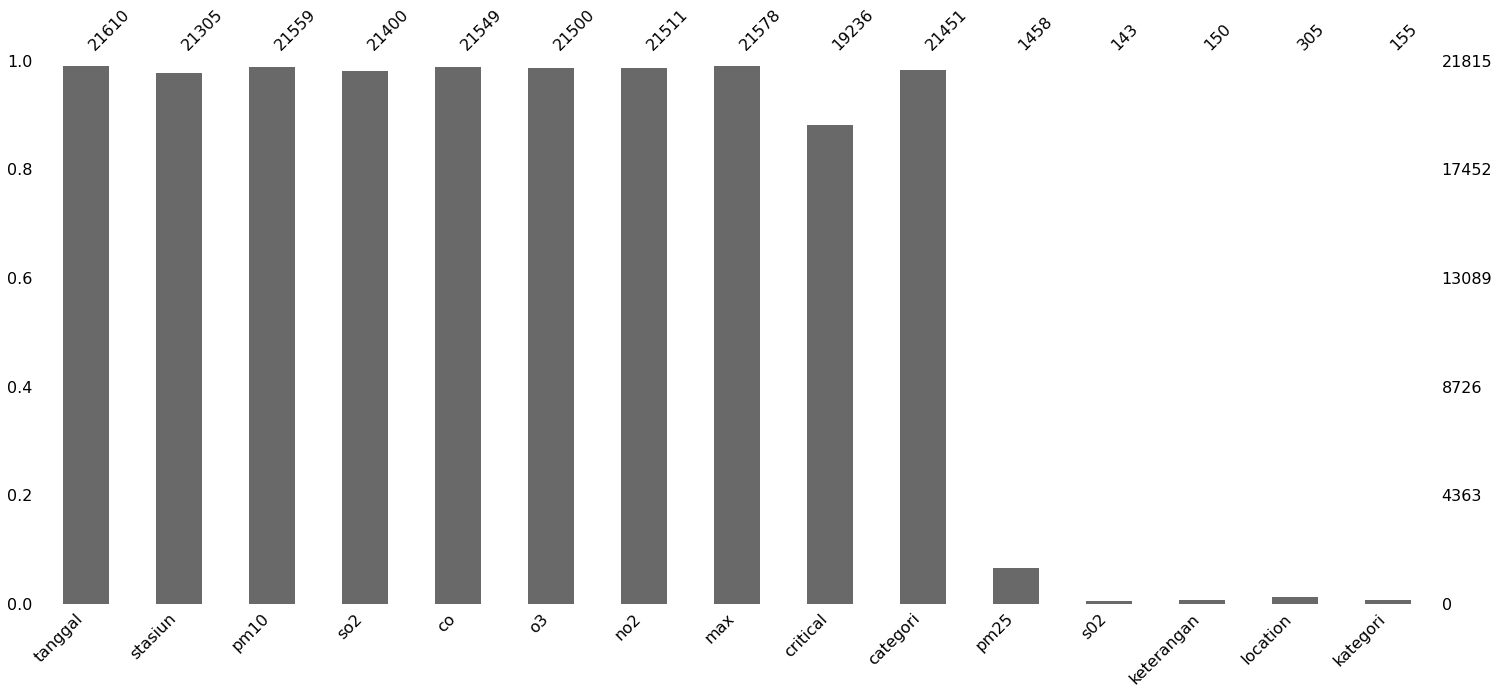

In [10]:
# melihat jumlah data pada masing-masing kolom dalam bentuk bar chart

msno.bar(df)

<AxesSubplot:>

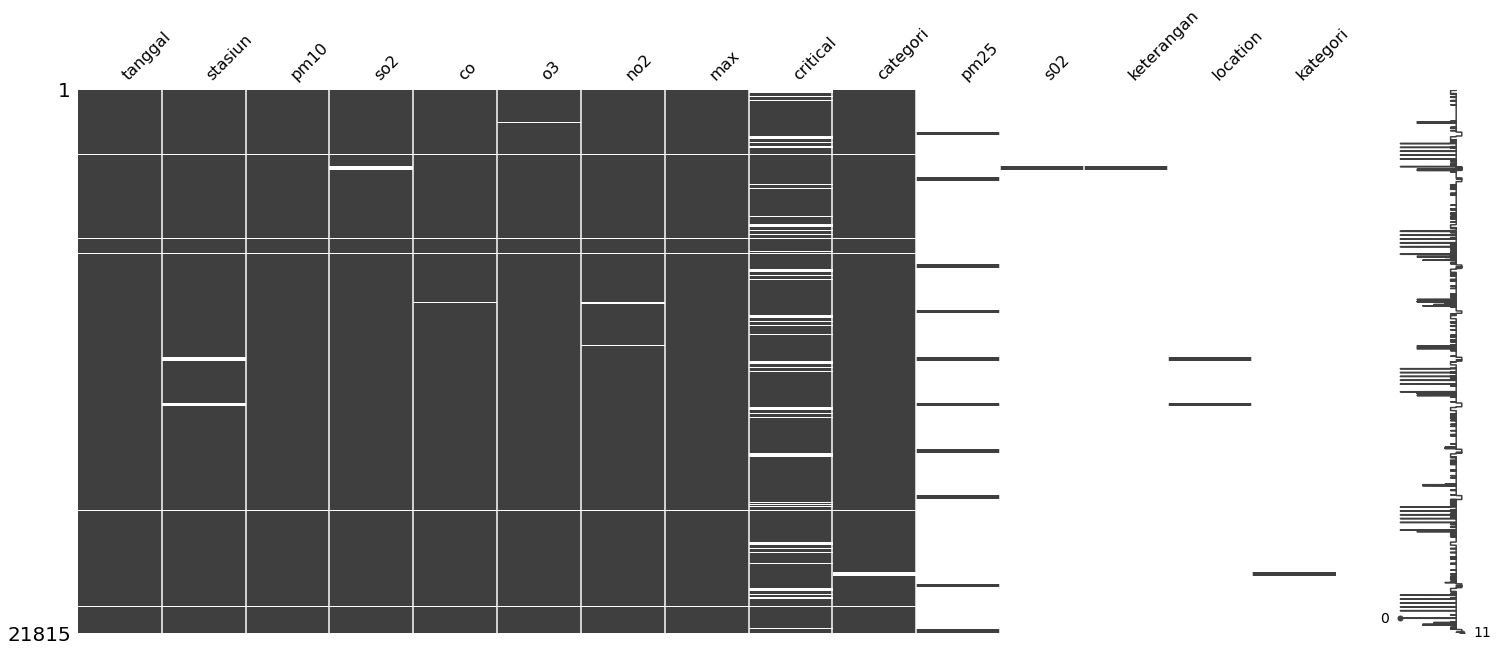

In [11]:
# melihat matrix missing values
# warna putih dan garis putih menunjukan data yang kosong atau hilang

msno.matrix(df)

<AxesSubplot:>

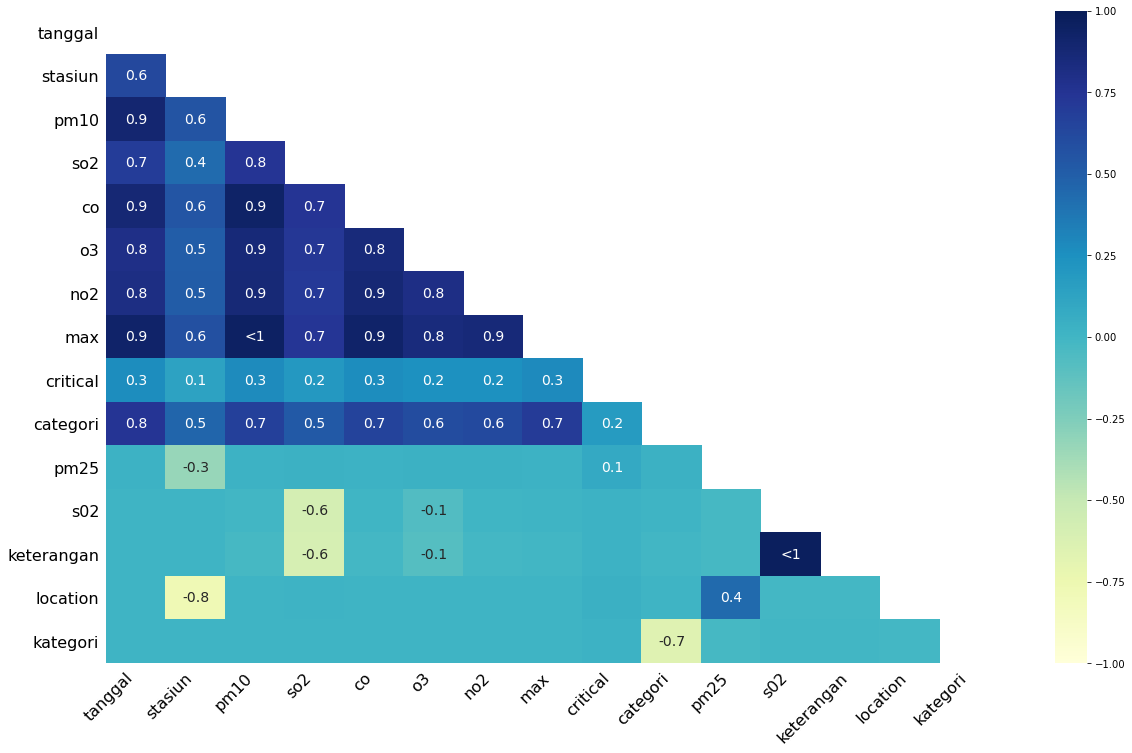

In [12]:
# Corelation heatmap untuk data null mengukur korelasi data null antara satu kolom dengan kolom lainnya dari suatu dataset 
# menunjukkan seberapa kuat ada atau tidak adanya satu fitur atau kolom mempengaruhi kolom yang lain.
# -1 means if one column(variable) is present, the other is almost certainly absent (strong negative correlation)
# 0 means there is no dependence between the columns (variables)
# 1 means if one column(variable) is present, the other is also certainly present (strong positive correlation)

msno.heatmap(df, cmap='YlGnBu')

terlhat jelas bahwa terdapat sejumlah besar data null secara signifikan pada kolom :
- critical
- pm25         
- s02          
- keterangan  
- kategori

Perlu diselidiki kenapa bisa terdapat banyak data null pada kolom-kolom tersebut, terdapat kisaran dari 11 sampai 99 persen data null. Di kolom lain hanya terdapat sedikit data null di kisaran 1 sampai 2 persen dari total data pada masing-masing kolom.

Secara visual data pada kolom "critical" tersebar secara acak dan data pada kolom "pm25" juga tersebar secara acak walaupun data pada kolom 'pm25' lebih banyak data yang kosong. Kita harus lebih lanjut memastikan apakah data tersebar secara acak atau tidak karena data belum disorting secara runut sesuai tanggal, tetapi ada cara lain untuk melihatnya dengan cara melihat ketergantungan / korelasi data yang hilang pada suatu kolom dengan kolom lainnya menggunakan heatmap 

Sedangkan data pada kolom "s02", "keterangan", dan "kategori" datanya yang tidak null terkelompok hanya di satu bagian dan sisanya data kosong.

Dari website https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2021 penjelasan untuk masing-masing variabel adalah sebagai berikut :

| No. | Kolom | Deskripsi |
| :- | -: | :-: |
| 1. | tanggal | Tanggal pengukuran kualitas udara |
| 2. | stasiun | Lokasi pengukuran di stasiun |
| 3. | pm10 | Partikulat salah satu parameter yang diukur |
| 4. | pm25 | Partikulat salah satu parameter yang diukur |
| 5. | so2 | Sulfida (dalam bentuk SO2) salah satu parameter yang diukur |
| 6. | co | Carbon Monoksida salah satu parameter yand diukur |
| 7. | o3 | Ozon salah satu parameter yang diukur |
| 8. | no2 | Nitrogen dioksida salah satu parameter yang diukur |
| 9. | max | Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama |
| 10. | critical | Parameter yang hasil pengukurannya paling tinggi |
| 11. | categori | Kategori hasil perhitungan indeks standar pencemaran udara |

tidak ada kolom dengan nama :
- pm25         
- s02          
- keterangan  
- kategori

tetapi di website https://data.jakarta.go.id/dataset?q=ispu untuk hasil pencarian ispu, dari tahun 2010 sampai 2020 tidak terdapat parameter polutan "pm25". "pm25" hanya terdapat di tahun 2021. "pm25" sebenarnya adalah pm2.5 (particulat matter 2.5) yaitu zat polutan yg ukuranya dibawah 2.5 mikron, lebih kecil dibanding pm10 (particulat matter 10) yang besarnya dibawah 10 mikron. Variabel pm2.5 baru ditambahkan pada tahun 2021. nanti akan lebih dieksplore variabel "pm25" ini, apakah akan didrop atau tetap digunakan.

pada penjelasan dari masing-masing kolom / variabel (metadata) di website, kemungkinan kolom ini adalah kolom yang salah penulisan yang padahal adalah kolom yg ada di penjelasan. 
- seperti kolom "s02" adalah kolom "so2", terdapat kesalahan penulisan yang harusnya huruf 'o' tetapi malah ditulis angka nol (0), dan ini diperkuat dari heatmap null data yaitu korelasi antara kolom "s02" dan kolom "so2 berkorelasi negatif (-0.6)
- kolom "categori" dan "kategori" juga menunjukan korelasi negatif yaitu (-0.7), dari bar chart jumlah data terlihat lebih banyak data pada kolom dengan nama "categori" dibanding "kategori", kemungkinan ini juga merupakan kesalahan penulisan

kita juga perlu menyelediki korelasi antara "keterangan" dan "so2" (-0.6)

korelasi antara "o3" dengan "so2" dan "keterangan" mendekati nol (tidak ada ketergantungan antara kolom /variabel) yang bisa kita abaikan.

kita akan lihat unique value pada kolom-kolom yang dicurigai memiliki kesalahan penulisan dan pada kolom dengan null values yang banyak.

akan dicek juga unique values pada kolom yang lain.

## Mengecek Keseragaman Isi dan Format Penulisan Data

In [13]:
# mengecek unique valus yang terdapat pada kolom "s02", "so2", "categori", "kategori", "keterangan"

unique_val_col_check = ["s02", "so2", "categori", "kategori", "keterangan"]         
unique_val_col_check

for i in unique_val_col_check:
        print(i)
        print("Data types :", df[i].dtypes)
        print(df[i].unique())
        print("\n")

s02
Data types : float64
[nan 22. 24. 23. 25. 27. 26. 28. 37. 29. 31. 33. 36. 14. 11.  7. 12.  9.
 13. 15. 18. 16. 21. 20. 17. 58. 56. 10. 19. 30.]


so2
Data types : object
['12' '15' '13' '---' '16' '17' '14' '18' '19' '23' '10' '11' '20' '9' '5'
 '6' '7' '27' '33' '25' '26' '31' '32' '22' '21' '29' '24' '45' '28' '8'
 '4' '37' '38' '42' '40' '30' '3' '2' '1' '35' '34' '36' '39' '46' '43'
 '47' '51' '50' '52' '10.0' '12.0' '11.0' '17.0' '20.0' '22.0' '30.0'
 '21.0' '23.0' '33.0' '24.0' '18.0' '16.0' nan '28.0' '15.0' '27.0' '19.0'
 '31.0' '32.0' '35.0' '34.0' '37.0' '25.0' '29.0' '53' '55' '58' '48' '54'
 '44' '41' '49' '63' '56' '61' '60' '57' '0' '1.0' '4.0' '3.0' '2.0' '5.0'
 '13.0' '7.0' '8.0' '6.0' '9.0' '26.0' '43.0' '45.0' '44.0' '47.0' '46.0'
 '48.0' '50.0' '49.0' '38.0' '36.0' '40.0' '14.0' '39.0' '72.0' '70.0'
 '52.0' '51.0' '53.0' '54.0' '55.0' '42.0' '41.0' '76' '70' '81' '102'
 '106' '74' '86' '94' '101' '83' '71' '59' '89' '69' '95' '97' '80' '100'
 '66' '79' '108' '91'

Terlihat dari perbandingan unique value :
- antara kolom `s02` dengan `so2` sama-sama bertipe data numerik, semakin menguatkan bahwa kolom `s02` adalah kolom yang salah penulisan, seharusnya `so2`.
- antara kolom `categori`, `kategori`, dan `keterangan` sama-sama memiliki data bersifat klasifikasi ('BAIK', 'SEDANG', 'TIDAK SEHAT,' 'SANGAT TIDAK SEHAT', 'BERBAHAYA', 'TIDAK ADA DATA'), dengan catatan pada kolom `categori` terdapat data yang tidak sesuai, terdapat data polutan ('PM10', 'O3', 'CO', 'SO2', 'PM25') yang harus dieksplor kenapa terdapat data itu.

kemungkinan data-data yang tidak pada tempatnya terjadi karena human error atau karena proses penggabungan file .csv, karena terdapat ketidaksesuaian jumlah kolom dan penamaan nama kolom yang seragam mengakibatkan beberapa data points bergeser

In [14]:
# mengecek unique valus yang terdapat pada kolom "tanggal", "stasiun", "max", "critical"

unique_val_col_check = ["tanggal", "stasiun", "max", "critical", "categori"]         
unique_val_col_check

for i in unique_val_col_check:
        print(i)
        print("Data types :", df[i].dtypes)
        print(df[i].unique())
        print("\n")

tanggal
Data types : datetime64[ns]
['2010-08-01T00:00:00.000000000' '2010-08-02T00:00:00.000000000'
 '2010-08-03T00:00:00.000000000' ... '2021-09-28T00:00:00.000000000'
 '2021-09-29T00:00:00.000000000' '2021-09-30T00:00:00.000000000']


stasiun
Data types : object
['DKI1 (Bunderan HI)' 'DKI2 (Kelapa Gading)' 'DKI3 (Jagakarsa)'
 'DKI4 (Lubang Buaya)' 'DKI5 (Kebon Jeruk)'
 'DKI5 (Kebon Jeruk) Jakarta Barat' nan '45' '34' '59' '56' '35' '36' '37'
 '39' '30' '40' '48' '64' '50' '41' '44' '62' '43' '58' '33' '49' '61'
 '47' '51' '42' '55' '54' '65' '53' '27' '71' '52' '63' '60' '66' '38'
 '---' '32' '74' '76' '70' '89' '69' '101' '57' '73' '78' '22' '24' '25']


max
Data types : object
['48.0' '57.0' '61.0' '0.0' '76.0' '60.0' '80.0' '73.0' '77.0' '63.0'
 '34.0' '27.0' '54.0' '43.0' '53.0' '74.0' '40.0' '44.0' '52.0' '71.0'
 '65.0' '51.0' '45.0' '49.0' '67.0' '70.0' '56.0' '100.0' '99.0' '84.0'
 '85.0' '66.0' '68.0' '62.0' '103.0' '72.0' '133.0' '113.0' '83.0' '165.0'
 '116.0' '168.0' '105

Terlihat dari unique value pada kolom :

- `tanggal` sudah sesuai, datanya berupa tanggal
- `stasiun` terdapat data yang tidak sesuai, seharusnya hanya terdapat data klasifikasi, tetapi di kolom `stasiun` terdapat data numerik.
- `max` sudah berisi data numerik.
- `critical` seharusnya hanya data jenis polutan yang tertinggi, tetapi terdapat jenis data yang tidak sesuai yaitu data numerik.
- `categori` seharusnya hanya berisi jenis data klasifikasi tingkat bahaya polutan, tetapi terdapat data yang tidak sesuai yaitu data nama polutan

In [15]:
# mengecek unique value pada data polutan (pm10, pm25, co, o3, no2)

unique_val_col_check = ["pm10", "pm25", "so2", "co", "o3", "no2"]         
unique_val_col_check

for i in unique_val_col_check:
        print(i)
        print("Data types :", df[i].dtypes)
        print(df[i].unique())
        print("\n")

pm10
Data types : object
['48' '57' '61' '---' '76' '60' '63' '54' '43' '53' '39' '44' '52' '65'
 '51' '68' '45' '49' '59' '56' '58' '66' '67' '74' '70' '64' '79' '62'
 '72' '71' '69' '73' '83' '80' '77' '92' '81' '84' '78' '75' '110' '95'
 '89' '119' '115' '134' '118' '127' '86' '100' '136' '171' '138' '113'
 '146' '126' '105' '116' '98' '41' '11' '8' '9' '6' '12' '32' '33' '7'
 '15' '36' '13' '34' '93' '47' '42' '30' '27' '38' '46' '50' '35' '37'
 '24' '123' '103' '101' '139' '97' '140' '114' '121' '132' '94' '99' '166'
 '109' '85' '128' '149' '106' '55' '25' '26' '17' '20' '22' '28' '21' '23'
 '19' '14' '87' '91' '82' '88' '40' '29' '108' '16' '96' '31' '107' '5'
 '18' '76.0' '53.0' '57.0' '56.0' '46.0' '48.0' '64.0' '72.0' '60.0'
 '69.0' '62.0' '63.0' '74.0' '59.0' '55.0' '54.0' '68.0' '67.0' '70.0'
 '49.0' '65.0' '79.0' nan '52.0' '58.0' '73.0' '61.0' '75.0' '21.0' '16.0'
 '15.0' '27.0' '43.0' '37.0' '28.0' '11.0' '19.0' '32.0' '30.0' '66.0'
 '86.0' '71.0' '92.0' '77.0' '80.0' '81

terlihat dari isi unique value pada kolom :
- `pm10` terdapat data yang tidak sesuai yaitu terdapat data nama stasiun yang seharusnya data pada kolom pm10 bersifat numerik
- `pm25` sudah sesuai yaitu data numerik
- `so2` sudah sesuai yaitu data numerik
- `co` sudah sesuai yaitu data numerik
- `o3` sudah sesuai yaitu data numerik
- `no2` sudah sesuai yaitu data numerik

dari keseluruhan kolom terdapat juga penulisan data kosong dengan cara penulisan seperti ini '---', kita akan ganti menjadi nan values agar terdeteksi oleh sistem sebagai data kosong, karena apabiola ditulis seperti ini '---' sistem akan mendeteksi bahwa data tersebut bukan missing values tau null values.

In [16]:
df.dtypes

tanggal       datetime64[ns]
stasiun               object
pm10                  object
so2                   object
co                    object
o3                    object
no2                   object
max                   object
critical              object
categori              object
pm25                  object
s02                  float64
keterangan            object
location              object
kategori              object
dtype: object

rata-rata data yang bersifat numerik terbaca dalam bentuk tipe data object (string), kita perlu mengubahnya menjadi tipe data numerik (float atau integer) agar kedepannya dapat dilakukan kalkulasi aritmatika apabila diperlukan,tentunya data harus sudah dalam bentuk numerik terlebih dahulu, seperti pda kolom `pm10`, data harus sudah tidak ada data nama stasiun.

data yang bersifat pengukuran atau ilai ukur harus dalam bentuk numerik seperti kolom-kolom jenis polutan dan kolom max harus bertipe data numerik. 

## Menghandle Ketidakseragaman isi Data dan Format Data

In [17]:
# Data Null pada dataframe ditulis dalam betuk string '---' yang seharusnya dalam bentuk nan (not a  number / null values)
# akan dilakukan pengubahan dari '---' menjadi nan

df = df.replace('---', np.NaN)

In [18]:
# mengecek apakah masih terdapat setidaknya satu value '---' di semua kolom
all_column = list(df.columns)

for i in all_column:
    print(i)
    if df.loc[df[i]=="---"].size:
        print("True")
    else:
        print("False")

tanggal
False
stasiun
False
pm10
False
so2
False
co
False
o3
False
no2
False
max
False
critical
False
categori
False
pm25
False
s02
False
keterangan
False
location
False
kategori
False


Terlihat bahwa sudah tidak terdapat value penulisan data kosong / missing value atau null value dengan cara penulisan seperti ini '---' di semua kolom.  

In [19]:
# mengecek apakah terdapat penambahan jumlah dan persentase data null karena pengubahann value "---" menjadi nan
display(df.info())
print('---------------------------------------')
display(df.isna().sum())
print('---------------------------------------')
display(df.isnull().mean().round(4)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     21610 non-null  datetime64[ns]
 1   stasiun     21302 non-null  object        
 2   pm10        18469 non-null  object        
 3   so2         18544 non-null  object        
 4   co          18859 non-null  object        
 5   o3          18608 non-null  object        
 6   no2         18713 non-null  object        
 7   max         21577 non-null  object        
 8   critical    19236 non-null  object        
 9   categori    21451 non-null  object        
 10  pm25        1440 non-null   object        
 11  s02         143 non-null    float64       
 12  keterangan  150 non-null    object        
 13  location    305 non-null    object        
 14  kategori    155 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 2.5+ MB


None

---------------------------------------


tanggal         205
stasiun         513
pm10           3346
so2            3271
co             2956
o3             3207
no2            3102
max             238
critical       2579
categori        364
pm25          20375
s02           21672
keterangan    21665
location      21510
kategori      21660
dtype: int64

---------------------------------------


tanggal        0.94
stasiun        2.35
pm10          15.34
so2           14.99
co            13.55
o3            14.70
no2           14.22
max            1.09
critical      11.82
categori       1.67
pm25          93.40
s02           99.34
keterangan    99.31
location      98.60
kategori      99.29
dtype: float64

Terlihat penambahan jumlah dan persentase null value pada kolom yang sebelumya terdapat "---" yaitu pada `semua kolom jenis polutan`, `stasiun`, dan `max`. Lonjakan signifikan terlihat pada data polutan

Sebelum kita mengubah kolom bertipe data yang tidak sesuai, karena beberapa kolom masih terdapat kolom dengan penulisan yang tidak seragam atau tidak sesuai seperti :
- `pm10` terdapat data yang tidak sesuai yaitu terdapat data nama stasiun yang seharusnya data pada kolom pm10 semua valuenya bersifat numerik atau angka.
- `stasiun` terdapat data yang tidak sesuai, seharusnya hanya terdapat data klasifikasi nama statsiun, tetapi di kolom `stasiun` terdapat data numerik.
- `critical` seharusnya hanya data jenis polutan yang tertinggi atau data klasifikasi, tetapi terdapat jenis data yang tidak sesuai yaitu data numerik.
- `categori` seharusnya hanya berisi jenis data klasifikasi tingkat bahaya polutan, tetapi terdapat data yang tidak sesuai yaitu data nama polutan

maka belum bisa dilakukan pengubahan tipe data, harus kita handle dulu data yang penulisannya tidak sesuai dengan tipe data kolom yang seharusnya. Dari kolom-kolom itu terlihat seperti ada korelasi antar kolom karena kolom yang datanya tidak seragam bersebalahan data yang tidak sesuai saling mengisi

pada data di kolom `pm10` terdapat data nama stasiun yang harusnya milik kolom `stasiun`
sedangkan pada kolom `stasiun` terdapat data numerik yang seharusnya milik kolom `pm10`

pada data di kolom `critical` terdapat data numerik, walaupun kolom sebalah kanannya yaitu `categori` bukan bertipe data numerik, tetapi kolom di sebelah kirinya merupakan kolom numerik yaitu kolom `max`

pada data kolom `categori` yang seharusnya hanya ada data klasifikasi tingkat bahaya polutan, tetapi terdapat data nama polutan yang seharusnya milik kolom `critical` di sebelah kiri kolom `categori`

terlihat seperti ada pergeseran sehingga value yang seharusnya pada kolom yang sesuai, bergeser ke kolom di sebelahnya

## menghandle kolom yang memiliki kesamaan value

seperti yang sudah dibahas sebelumnya, didapat :
- antara kolom `s02` dengan `so2` sama-sama bertipe data numerik, semakin menguatkan bahwa kolom `s02` adalah kolom yang salah penulisan, seharusnya `so2`.
- antara kolom `categori`, `kategori`, dan `keterangan` sama-sama memiliki data bersifat klasifikasi ('BAIK', 'SEDANG', 'TIDAK SEHAT,' 'SANGAT TIDAK SEHAT', 'BERBAHAYA', 'TIDAK ADA DATA'), dengan catatan pada kolom `categori` terdapat data yang tidak sesuai, terdapat data polutan ('PM10', 'O3', 'CO', 'SO2', 'PM25') yang harus dieksplor kenapa terdapat data itu.

In [20]:
# eksplorasi data not-null pada kolom 's02'

df_s02 = df.loc[df['s02'].notnull()]
df_s02

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,location,kategori
3090,2018-04-01,DKI1 (Bunderan HI),25.0,NaN,17.0,22.0,1.0,25.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3091,2018-04-02,DKI1 (Bunderan HI),39.0,NaN,18.0,24.0,2.0,39.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3092,2018-04-03,DKI1 (Bunderan HI),45.0,NaN,27.0,23.0,2.0,45.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3093,2018-04-04,DKI1 (Bunderan HI),18.0,NaN,20.0,29.0,3.0,29.0,4.0,O3,NaN,22.0,BAIK,NaN,NaN
3094,2018-04-05,DKI1 (Bunderan HI),8.0,NaN,25.0,16.0,4.0,25.0,3.0,CO,NaN,24.0,BAIK,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,2018-04-25,DKI5 (Kebon Jeruk) Jakarta Barat,61.0,NaN,28.0,35.0,4.0,61.0,1.0,PM10,NaN,16.0,SEDANG,NaN,NaN
3235,2018-04-26,DKI5 (Kebon Jeruk) Jakarta Barat,62.0,NaN,34.0,56.0,8.0,62.0,1.0,PM10,NaN,30.0,SEDANG,NaN,NaN
3236,2018-04-27,DKI5 (Kebon Jeruk) Jakarta Barat,47.0,NaN,15.0,48.0,4.0,48.0,4.0,O3,NaN,15.0,BAIK,NaN,NaN
3237,2018-04-28,DKI5 (Kebon Jeruk) Jakarta Barat,38.0,NaN,14.0,96.0,5.0,96.0,4.0,O3,NaN,16.0,SEDANG,NaN,NaN


In [21]:
# eksplorasi data not-null pada kolom 'keterangan'

df_s02 = df.loc[df['keterangan'].notnull()]
df_s02

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,location,kategori
3090,2018-04-01,DKI1 (Bunderan HI),25.0,NaN,17.0,22.0,1.0,25.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3091,2018-04-02,DKI1 (Bunderan HI),39.0,NaN,18.0,24.0,2.0,39.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3092,2018-04-03,DKI1 (Bunderan HI),45.0,NaN,27.0,23.0,2.0,45.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3093,2018-04-04,DKI1 (Bunderan HI),18.0,NaN,20.0,29.0,3.0,29.0,4.0,O3,NaN,22.0,BAIK,NaN,NaN
3094,2018-04-05,DKI1 (Bunderan HI),8.0,NaN,25.0,16.0,4.0,25.0,3.0,CO,NaN,24.0,BAIK,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,2018-04-26,DKI5 (Kebon Jeruk) Jakarta Barat,62.0,NaN,34.0,56.0,8.0,62.0,1.0,PM10,NaN,30.0,SEDANG,NaN,NaN
3236,2018-04-27,DKI5 (Kebon Jeruk) Jakarta Barat,47.0,NaN,15.0,48.0,4.0,48.0,4.0,O3,NaN,15.0,BAIK,NaN,NaN
3237,2018-04-28,DKI5 (Kebon Jeruk) Jakarta Barat,38.0,NaN,14.0,96.0,5.0,96.0,4.0,O3,NaN,16.0,SEDANG,NaN,NaN
3238,2018-04-29,DKI5 (Kebon Jeruk) Jakarta Barat,65.0,NaN,20.0,120.0,5.0,120.0,4.0,O3,NaN,13.0,TIDAK SEHAT,NaN,NaN


In [22]:
# eksplorasi data not-null pada kolom 'kategori'

df_s02 = df.loc[df['kategori'].notnull()]
df_s02

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,location,kategori
19365,2018-10-01,DKI1 (Bunderan HI),47,11,15,26,4,47,PM10,NaN,NaN,NaN,NaN,NaN,BAIK
19366,2018-10-02,DKI1 (Bunderan HI),63,11,19,14,4,63,PM10,NaN,NaN,NaN,NaN,NaN,SEDANG
19367,2018-10-03,DKI1 (Bunderan HI),37,10,17,33,5,37,PM10,NaN,NaN,NaN,NaN,NaN,BAIK
19368,2018-10-04,DKI1 (Bunderan HI),38,11,17,35,4,38,PM10,NaN,NaN,NaN,NaN,NaN,BAIK
19369,2018-10-05,DKI1 (Bunderan HI),46,11,16,37,3,46,PM10,NaN,NaN,NaN,NaN,NaN,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19515,2018-10-27,DKI5 (Kebon Jeruk) Jakarta Barat,57,26,23,67,11,67,O3,NaN,NaN,NaN,NaN,NaN,SEDANG
19516,2018-10-28,DKI5 (Kebon Jeruk) Jakarta Barat,39,21,14,61,NaN,61,O3,NaN,NaN,NaN,NaN,NaN,SEDANG
19517,2018-10-29,DKI5 (Kebon Jeruk) Jakarta Barat,27,25,14,66,NaN,66,O3,NaN,NaN,NaN,NaN,NaN,SEDANG
19518,2018-10-30,DKI5 (Kebon Jeruk) Jakarta Barat,52,31,14,57,7,57,O3,NaN,NaN,NaN,NaN,NaN,SEDANG


-  terlihat bahwa dari ketiga kolom "s02", "keterangan", "kategori" terdapat pola yang sama, yaitu data not-null terkumpul dalam satu periode tertentu secara berurutan, dari awal bulan sampai akhir bulan

-  setiap kolom "s02" yang memiliki data, kolom "so2" selalu null
- setiap kolom "kategori" yang memiliki data, kolom "categori" selalu null
-  setiap kolom "keterangan" yang memiliki data, kolom "kategori" selalu null

-  kita bisa memindahkan data pada kolom "s02" ke kolom "so2"
-  data pada kolom "keterangan", "kategori" ke kolom "categori"
-  setelah dipindahkan atau dicopy datanya, kita hapus / drop kolom "s02", "keterangan", "kategori"

In [23]:
# mengcopy data pada "s02" ke kolom "so2"
df['so2'] = df['so2'].fillna(df['s02'])

# mengecek apakah datanya sudah tercopy dari "s02" ke "so2"
df_s02 = df.loc[df['s02'].notnull()]

display(df_s02)
display(df.info())

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,location,kategori
3090,2018-04-01,DKI1 (Bunderan HI),25.0,22,17.0,22.0,1.0,25.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3091,2018-04-02,DKI1 (Bunderan HI),39.0,22,18.0,24.0,2.0,39.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3092,2018-04-03,DKI1 (Bunderan HI),45.0,22,27.0,23.0,2.0,45.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3093,2018-04-04,DKI1 (Bunderan HI),18.0,22,20.0,29.0,3.0,29.0,4.0,O3,NaN,22.0,BAIK,NaN,NaN
3094,2018-04-05,DKI1 (Bunderan HI),8.0,24,25.0,16.0,4.0,25.0,3.0,CO,NaN,24.0,BAIK,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,2018-04-25,DKI5 (Kebon Jeruk) Jakarta Barat,61.0,16,28.0,35.0,4.0,61.0,1.0,PM10,NaN,16.0,SEDANG,NaN,NaN
3235,2018-04-26,DKI5 (Kebon Jeruk) Jakarta Barat,62.0,30,34.0,56.0,8.0,62.0,1.0,PM10,NaN,30.0,SEDANG,NaN,NaN
3236,2018-04-27,DKI5 (Kebon Jeruk) Jakarta Barat,47.0,15,15.0,48.0,4.0,48.0,4.0,O3,NaN,15.0,BAIK,NaN,NaN
3237,2018-04-28,DKI5 (Kebon Jeruk) Jakarta Barat,38.0,16,14.0,96.0,5.0,96.0,4.0,O3,NaN,16.0,SEDANG,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     21610 non-null  datetime64[ns]
 1   stasiun     21302 non-null  object        
 2   pm10        18469 non-null  object        
 3   so2         18687 non-null  object        
 4   co          18859 non-null  object        
 5   o3          18608 non-null  object        
 6   no2         18713 non-null  object        
 7   max         21577 non-null  object        
 8   critical    19236 non-null  object        
 9   categori    21451 non-null  object        
 10  pm25        1440 non-null   object        
 11  s02         143 non-null    float64       
 12  keterangan  150 non-null    object        
 13  location    305 non-null    object        
 14  kategori    155 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 2.5+ MB


None

In [24]:
df.so2.unique() # check unique value pada kolom "categori"

array(['12', '15', '13', nan, '16', '17', '14', '18', '19', '23', '10',
       '11', '20', '9', '5', '6', '7', '27', '33', '25', '26', '31', '32',
       '22', '21', '29', '24', '45', '28', '8', '4', '37', '38', '42',
       '40', '30', '3', '2', '1', '35', '34', '36', '39', '46', '43',
       '47', '51', '50', '52', '10.0', '12.0', '11.0', '17.0', '20.0',
       '22.0', '30.0', '21.0', '23.0', '33.0', '24.0', '18.0', '16.0',
       '28.0', '15.0', '27.0', '19.0', '31.0', '32.0', '35.0', '34.0',
       '37.0', '25.0', '29.0', '53', '55', '58', '48', '54', '44', '41',
       '49', 22.0, 24.0, 23.0, 25.0, 27.0, 26.0, 28.0, 37.0, 29.0, 31.0,
       33.0, 36.0, 14.0, 11.0, 7.0, 12.0, 9.0, 13.0, 15.0, 18.0, 16.0,
       21.0, 20.0, 17.0, 58.0, 56.0, 10.0, 19.0, 30.0, '63', '56', '61',
       '60', '57', '0', '1.0', '4.0', '3.0', '2.0', '5.0', '13.0', '7.0',
       '8.0', '6.0', '9.0', '26.0', '43.0', '45.0', '44.0', '47.0',
       '46.0', '48.0', '50.0', '49.0', '38.0', '36.0', '40.0', '14.

- kolom so2 sudah memiliki data bertipe numerik untuk semua valuenya
- terlihat data pada kolom "s02" sudah tercopy ke kolom "so2"
- terlihat penambahan jumlah data pada kolom "so2"
- data "so2" + data "s02"
- 18544 + 143 = 18687
- data "so2" menjadi 18687

In [25]:
# mengcopy data pada "kategori" ke kolom "categori"
df['categori'] = df['categori'].fillna(df['kategori'])

# mengecek apakah datanya sudah tercopy dari "kategori" ke kolom "categori"
df_kategori = df.loc[df['kategori'].notnull()]
df_kategori

display(df_kategori)
display(df.info())

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,location,kategori
19365,2018-10-01,DKI1 (Bunderan HI),47,11,15,26,4,47,PM10,BAIK,NaN,NaN,NaN,NaN,BAIK
19366,2018-10-02,DKI1 (Bunderan HI),63,11,19,14,4,63,PM10,SEDANG,NaN,NaN,NaN,NaN,SEDANG
19367,2018-10-03,DKI1 (Bunderan HI),37,10,17,33,5,37,PM10,BAIK,NaN,NaN,NaN,NaN,BAIK
19368,2018-10-04,DKI1 (Bunderan HI),38,11,17,35,4,38,PM10,BAIK,NaN,NaN,NaN,NaN,BAIK
19369,2018-10-05,DKI1 (Bunderan HI),46,11,16,37,3,46,PM10,BAIK,NaN,NaN,NaN,NaN,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19515,2018-10-27,DKI5 (Kebon Jeruk) Jakarta Barat,57,26,23,67,11,67,O3,SEDANG,NaN,NaN,NaN,NaN,SEDANG
19516,2018-10-28,DKI5 (Kebon Jeruk) Jakarta Barat,39,21,14,61,NaN,61,O3,SEDANG,NaN,NaN,NaN,NaN,SEDANG
19517,2018-10-29,DKI5 (Kebon Jeruk) Jakarta Barat,27,25,14,66,NaN,66,O3,SEDANG,NaN,NaN,NaN,NaN,SEDANG
19518,2018-10-30,DKI5 (Kebon Jeruk) Jakarta Barat,52,31,14,57,7,57,O3,SEDANG,NaN,NaN,NaN,NaN,SEDANG


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     21610 non-null  datetime64[ns]
 1   stasiun     21302 non-null  object        
 2   pm10        18469 non-null  object        
 3   so2         18687 non-null  object        
 4   co          18859 non-null  object        
 5   o3          18608 non-null  object        
 6   no2         18713 non-null  object        
 7   max         21577 non-null  object        
 8   critical    19236 non-null  object        
 9   categori    21606 non-null  object        
 10  pm25        1440 non-null   object        
 11  s02         143 non-null    float64       
 12  keterangan  150 non-null    object        
 13  location    305 non-null    object        
 14  kategori    155 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 2.5+ MB


None

- terlihat data pada kolom "Kategori" sudah tercopy ke kolom "categori"
- terlihat penambahan jumlah data pada kolom "categori"
- data "categori" + data "Kategori"
- 21451 + 155 = 21606
- data "categori" menjadi 21606

In [26]:
# mengcopy data pada "keterangan" ke kolom "categori"
df['categori'] = df['categori'].fillna(df['keterangan'])

# mengecek apakah datanya sudah tercopy
df_keterangan = df.loc[df['keterangan'].notnull()]
df_keterangan

display(df_keterangan)
display(df.info())

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,location,kategori
3090,2018-04-01,DKI1 (Bunderan HI),25.0,22,17.0,22.0,1.0,25.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3091,2018-04-02,DKI1 (Bunderan HI),39.0,22,18.0,24.0,2.0,39.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3092,2018-04-03,DKI1 (Bunderan HI),45.0,22,27.0,23.0,2.0,45.0,1.0,PM10,NaN,22.0,BAIK,NaN,NaN
3093,2018-04-04,DKI1 (Bunderan HI),18.0,22,20.0,29.0,3.0,29.0,4.0,O3,NaN,22.0,BAIK,NaN,NaN
3094,2018-04-05,DKI1 (Bunderan HI),8.0,24,25.0,16.0,4.0,25.0,3.0,CO,NaN,24.0,BAIK,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,2018-04-26,DKI5 (Kebon Jeruk) Jakarta Barat,62.0,30,34.0,56.0,8.0,62.0,1.0,PM10,NaN,30.0,SEDANG,NaN,NaN
3236,2018-04-27,DKI5 (Kebon Jeruk) Jakarta Barat,47.0,15,15.0,48.0,4.0,48.0,4.0,O3,NaN,15.0,BAIK,NaN,NaN
3237,2018-04-28,DKI5 (Kebon Jeruk) Jakarta Barat,38.0,16,14.0,96.0,5.0,96.0,4.0,O3,NaN,16.0,SEDANG,NaN,NaN
3238,2018-04-29,DKI5 (Kebon Jeruk) Jakarta Barat,65.0,13,20.0,120.0,5.0,120.0,4.0,O3,NaN,13.0,TIDAK SEHAT,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     21610 non-null  datetime64[ns]
 1   stasiun     21302 non-null  object        
 2   pm10        18469 non-null  object        
 3   so2         18687 non-null  object        
 4   co          18859 non-null  object        
 5   o3          18608 non-null  object        
 6   no2         18713 non-null  object        
 7   max         21577 non-null  object        
 8   critical    19236 non-null  object        
 9   categori    21609 non-null  object        
 10  pm25        1440 non-null   object        
 11  s02         143 non-null    float64       
 12  keterangan  150 non-null    object        
 13  location    305 non-null    object        
 14  kategori    155 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 2.5+ MB


None

- ternyata belum tercopy semua dikarenakan pada kolom categori ketika difilter berdasarkan kolom keterangan yang tidak null, sebagian besar data pada kolom categori tidak null, metode copy sebelumnya hanya berfungsi apabila data tujuan copy tidak ada data null/Nan, sehingga perlu dilakukan metode lain

In [27]:
# menggunakan fungsi loc untuk mengcopy, 
# kita gunakan bantuan indeks untuk mengubah row mana yang ingin dicopy
df.loc[3090:3239,'categori'] = df['keterangan']

# mengecek apakah datanya sudah tercopy
df_keterangan = df.loc[df['keterangan'].notnull()]
df_keterangan

display(df_keterangan)
display(df.info())


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,s02,keterangan,location,kategori
3090,2018-04-01,DKI1 (Bunderan HI),25.0,22,17.0,22.0,1.0,25.0,1.0,BAIK,NaN,22.0,BAIK,NaN,NaN
3091,2018-04-02,DKI1 (Bunderan HI),39.0,22,18.0,24.0,2.0,39.0,1.0,BAIK,NaN,22.0,BAIK,NaN,NaN
3092,2018-04-03,DKI1 (Bunderan HI),45.0,22,27.0,23.0,2.0,45.0,1.0,BAIK,NaN,22.0,BAIK,NaN,NaN
3093,2018-04-04,DKI1 (Bunderan HI),18.0,22,20.0,29.0,3.0,29.0,4.0,BAIK,NaN,22.0,BAIK,NaN,NaN
3094,2018-04-05,DKI1 (Bunderan HI),8.0,24,25.0,16.0,4.0,25.0,3.0,BAIK,NaN,24.0,BAIK,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,2018-04-26,DKI5 (Kebon Jeruk) Jakarta Barat,62.0,30,34.0,56.0,8.0,62.0,1.0,SEDANG,NaN,30.0,SEDANG,NaN,NaN
3236,2018-04-27,DKI5 (Kebon Jeruk) Jakarta Barat,47.0,15,15.0,48.0,4.0,48.0,4.0,BAIK,NaN,15.0,BAIK,NaN,NaN
3237,2018-04-28,DKI5 (Kebon Jeruk) Jakarta Barat,38.0,16,14.0,96.0,5.0,96.0,4.0,SEDANG,NaN,16.0,SEDANG,NaN,NaN
3238,2018-04-29,DKI5 (Kebon Jeruk) Jakarta Barat,65.0,13,20.0,120.0,5.0,120.0,4.0,TIDAK SEHAT,NaN,13.0,TIDAK SEHAT,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     21610 non-null  datetime64[ns]
 1   stasiun     21302 non-null  object        
 2   pm10        18469 non-null  object        
 3   so2         18687 non-null  object        
 4   co          18859 non-null  object        
 5   o3          18608 non-null  object        
 6   no2         18713 non-null  object        
 7   max         21577 non-null  object        
 8   critical    19236 non-null  object        
 9   categori    21609 non-null  object        
 10  pm25        1440 non-null   object        
 11  s02         143 non-null    float64       
 12  keterangan  150 non-null    object        
 13  location    305 non-null    object        
 14  kategori    155 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 2.5+ MB


None

In [28]:
df.categori.unique() # check unique value pada kolom "categori"

array(['BAIK', 'SEDANG', 'TIDAK ADA DATA', 'TIDAK SEHAT',
       'SANGAT TIDAK SEHAT', nan, 'PM25', 'SO2', 'PM10', 'O3',
       'BERBAHAYA'], dtype=object)

- terlihat data pada kolom "Keterangan" sudah tercopy ke kolom "categori"
- tidak terlihat penambahan jumlah data pada kolom "categori" karena bukan mengisi nan value tapi menggantikan data pada range indeks yang dipilih pada kolom "categori"
- masih terdapat value yang tidak sesuai pada tempatnya ('PM25', 'SO2', 'PM10', 'O3'), akan dieksplor lebih jauh dan disesuaikan dengan kolom "categori"

karena kolom "s02" "keterangan" "kategori" sudah tidak digunakan maka akan di-drop

In [29]:
df = df.drop(['s02', 'keterangan', 'kategori'], axis = 1)
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,location
0,2010-08-01,DKI1 (Bunderan HI),48,12,19,47,25,48.0,PM10,BAIK,NaN,NaN
1,2010-08-02,DKI1 (Bunderan HI),57,15,36,57,29,57.0,PM10,SEDANG,NaN,NaN
2,2010-08-03,DKI1 (Bunderan HI),61,13,31,48,17,61.0,PM10,SEDANG,NaN,NaN
3,2010-08-04,DKI1 (Bunderan HI),NaN,NaN,NaN,NaN,NaN,0.0,NaN,TIDAK ADA DATA,NaN,NaN
4,2010-08-05,DKI1 (Bunderan HI),76,16,NaN,56,26,76.0,PM10,SEDANG,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21810,2021-09-26,DKI5 (Kebon Jeruk) Jakarta Barat,48,NaN,4,30,9,67,PM25,SEDANG,67,NaN
21811,2021-09-27,DKI5 (Kebon Jeruk) Jakarta Barat,51,NaN,9,22,18,78,PM25,SEDANG,78,NaN
21812,2021-09-28,DKI5 (Kebon Jeruk) Jakarta Barat,42,NaN,5,26,14,64,PM25,SEDANG,64,NaN
21813,2021-09-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,NaN,11,34,19,87,PM25,SEDANG,87,NaN


In [30]:

print('PM25')
display(df.loc[df['categori']=='PM25'])

print('SO2')
display(df.loc[df['categori']=='SO2'])

print('PM10')
display(df.loc[df['categori']=='PM10'])

print('O3')
display(df.loc[df['categori']=='O3'])

PM25


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,location
10740,2021-07-01,NaN,DKI1 (Bunderan HI),76,27,14,20,31,76,PM25,55,SEDANG
10741,2021-07-02,NaN,DKI1 (Bunderan HI),70,33,16,14,30,70,PM25,55,SEDANG
10742,2021-07-03,NaN,DKI1 (Bunderan HI),81,33,12,19,25,81,PM25,58,SEDANG
10743,2021-07-04,NaN,DKI1 (Bunderan HI),102,27,11,27,22,102,PM25,68,TIDAK SEHAT
10744,2021-07-05,NaN,DKI1 (Bunderan HI),106,28,12,34,25,106,PM25,71,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...,...,...
12720,2021-06-26,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,70,39,8,16,22,70,PM25,45,SEDANG
12721,2021-06-27,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,120,28,22,17,41,120,PM25,68,TIDAK SEHAT
12722,2021-06-28,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,99,25,17,21,30,99,PM25,59,SEDANG
12723,2021-06-29,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,128,35,24,21,50,128,PM25,72,TIDAK SEHAT


SO2


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,location
10781,2021-07-11,NaN,DKI2 (Kelapa Gading),NaN,54,10,54,13,54,SO2,NaN,SEDANG


PM10


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,location
10782,2021-07-12,NaN,DKI2 (Kelapa Gading),NaN,52,9,44,13,64,PM10,64,SEDANG
10793,2021-07-23,NaN,DKI2 (Kelapa Gading),NaN,52,9,59,20,61,PM10,61,SEDANG
10813,2021-07-12,NaN,DKI3 (Jagakarsa),NaN,47,4,14,11,50,PM10,50,BAIK
10830,2021-07-29,NaN,DKI3 (Jagakarsa),28,47,17,26,18,73,PM10,73,SEDANG
10831,2021-07-30,NaN,DKI3 (Jagakarsa),29,51,14,43,21,75,PM10,75,SEDANG
10832,2021-07-31,NaN,DKI3 (Jagakarsa),26,9,18,31,29,57,PM10,57,SEDANG
12663,2021-06-29,NaN,DKI3 (Jagakarsa),30,52,8,25,19,71,PM10,71,SEDANG
12664,2021-06-30,NaN,DKI3 (Jagakarsa),26,49,10,23,19,79,PM10,79,SEDANG
12699,2021-06-05,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,24,15,21,29,57,PM10,57,SEDANG
12700,2021-06-06,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,NaN,23,13,25,22,54,PM10,54,SEDANG


O3


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25,location
10801,2021-07-31,NaN,DKI2 (Kelapa Gading),NaN,50,8,65,18,65,O3,63,SEDANG


kita akan lihat sumber aslinya untuk referensi kesalahan apa yang menyebabkan data tidak sesuai pada tempatnya

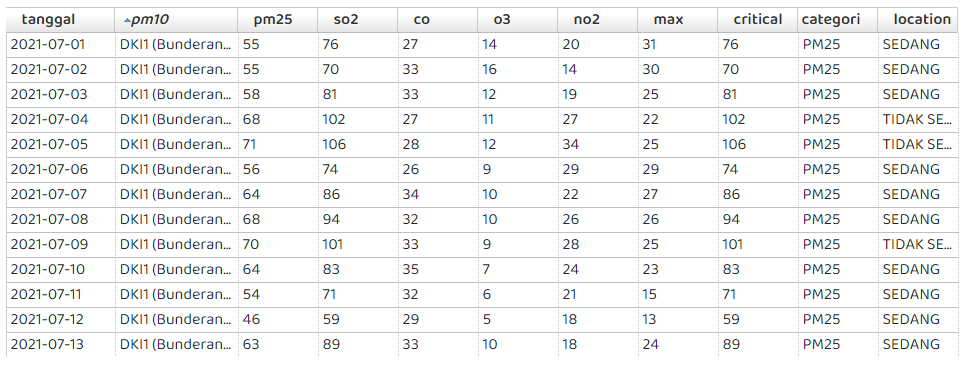

terlihat jelas bahwa memang dari data aslinya penempatan datanya tidak sesuai, tidak terdapat kolom "stasiun", jadi datanya bergeser satu kolom ke kiri, seharusnya yang benar adalah seperti ini 

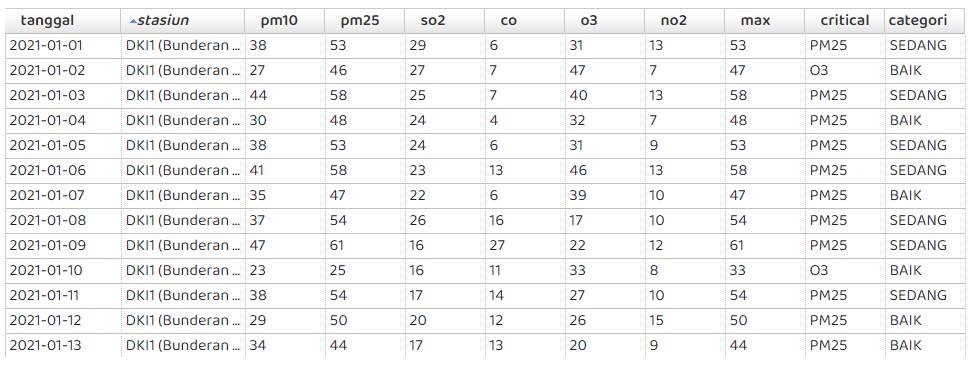

selanjutnya dari dataframe yang telah kita buat, kita akan pindahkan posisi kolom PM25 berada diantara PM10  dan so2 lalu kita akan geser satu kolom ke kiri utuk menyesuaikan data dengan kolom

## Menghandle data yang bergeser pada beberapa kolom  dan menghandle data yang tidak sesuai pada kolom "categori"

In [31]:
df.columns

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori', 'pm25', 'location'],
      dtype='object')

In [32]:
# ubah urutan kolom

old_cols = df.columns.values 
new_cols= ['tanggal', 'stasiun', 'pm10', 'pm25', 
           'so2', 'co', 'o3', 'no2', 'max', 'critical', 'categori', 'location']
df = df.reindex(columns=new_cols)
print('PM25')
display(df.loc[df['categori']=='PM25'])

PM25


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
10740,2021-07-01,NaN,DKI1 (Bunderan HI),55,76,27,14,20,31,76,PM25,SEDANG
10741,2021-07-02,NaN,DKI1 (Bunderan HI),55,70,33,16,14,30,70,PM25,SEDANG
10742,2021-07-03,NaN,DKI1 (Bunderan HI),58,81,33,12,19,25,81,PM25,SEDANG
10743,2021-07-04,NaN,DKI1 (Bunderan HI),68,102,27,11,27,22,102,PM25,TIDAK SEHAT
10744,2021-07-05,NaN,DKI1 (Bunderan HI),71,106,28,12,34,25,106,PM25,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...,...,...
12720,2021-06-26,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,45,70,39,8,16,22,70,PM25,SEDANG
12721,2021-06-27,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,68,120,28,22,17,41,120,PM25,TIDAK SEHAT
12722,2021-06-28,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,59,99,25,17,21,30,99,PM25,SEDANG
12723,2021-06-29,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,72,128,35,24,21,50,128,PM25,TIDAK SEHAT


In [33]:
# CARA MANUAL
# memperbaiki urutan data yang bergeser ke kanan, agar digeser satu persatu ke kiri untuk data PM25


# df.loc[10740:12724,'stasiun'] = df['pm10'];
# df.loc[10740:12724,'pm10'] = df['pm25'];
# df.loc[10740:12724,'pm25'] = df['so2'];
# df.loc[10740:12724,'so2'] = df['co'];
# df.loc[10740:12724,'co'] = df['o3'];
# df.loc[10740:12724,'o3'] = df['no2'];
# df.loc[10740:12724,'no2'] = df['max'];
# df.loc[10740:12724,'max'] = df['critical'];
# df.loc[10740:12724,'critical'] = df['categori'];

# df.loc[10740:12724,'categori'] = df['categori'].replace('PM25', np.NaN);

# df.loc[10740:12724]




# menggeser seluruh value kolom satu step ke kiri
#  df.loc[10740:12724] = df.loc[10740:12724].T.shift(-1,axis=0).T

In [34]:
# memunculkan semua baris
pd.set_option("display.max_rows", None)

print('PM25')
display(df.loc[df['categori']=='PM25'])

PM25


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
10740,2021-07-01,NaN,DKI1 (Bunderan HI),55,76,27,14,20,31,76,PM25,SEDANG
10741,2021-07-02,NaN,DKI1 (Bunderan HI),55,70,33,16,14,30,70,PM25,SEDANG
10742,2021-07-03,NaN,DKI1 (Bunderan HI),58,81,33,12,19,25,81,PM25,SEDANG
10743,2021-07-04,NaN,DKI1 (Bunderan HI),68,102,27,11,27,22,102,PM25,TIDAK SEHAT
10744,2021-07-05,NaN,DKI1 (Bunderan HI),71,106,28,12,34,25,106,PM25,TIDAK SEHAT
10745,2021-07-06,NaN,DKI1 (Bunderan HI),56,74,26,9,29,29,74,PM25,SEDANG
10746,2021-07-07,NaN,DKI1 (Bunderan HI),64,86,34,10,22,27,86,PM25,SEDANG
10747,2021-07-08,NaN,DKI1 (Bunderan HI),68,94,32,10,26,26,94,PM25,SEDANG
10748,2021-07-09,NaN,DKI1 (Bunderan HI),70,101,33,9,28,25,101,PM25,TIDAK SEHAT
10749,2021-07-10,NaN,DKI1 (Bunderan HI),64,83,35,7,24,23,83,PM25,SEDANG


range indexnya terbagi menjadi :
- 10740 - 10894
- 12575 - 12698
- 12702 - 12724

- kolom `location` ternyata adalah milik `categori`, kita akan geser juga value kolom location ke ke kolom `categori`

In [35]:
# cara menggunakan for loop
# menggeser dari indeks 10740 sampai 10894

for i in range(1,11): # loop dari kolom yang akan digeser
    df.iloc[10740:10895,i] = df.iloc[10740:10895,i+1]   # setiap kolom mendapatkan nilai dari kolom sebelahnya

# df.loc[10740:10894,'categori'] = df['categori'].replace('PM25', np.NaN)

In [36]:
# menggeser dari indeks 12575 sampai 12698
for i in range(1,11): # loop dari kolom yang akan digeser
    df.iloc[12575:12699,i] = df.iloc[12575:12699,i+1]

# df.loc[12575:12698,'categori'] = df['categori'].replace('PM25', np.NaN)

In [37]:
# menggeser dari indeks 12702 sampai 12724
for i in range(1,11): # loop dari kolom yang akan digeser
    df.iloc[12702:12725,i] = df.iloc[12702:12725,i+1]
    
# df.loc[12702:12724,'categori'] = df['categori'].replace('PM25', np.NaN)

In [38]:
pd.set_option("display.max_rows", 10)

display(df.loc[10740:10894])
display(df.loc[12575:12698])
display(df.loc[12702:12724])

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
10740,2021-07-01,DKI1 (Bunderan HI),55,76,27,14,20,31,76,PM25,SEDANG,SEDANG
10741,2021-07-02,DKI1 (Bunderan HI),55,70,33,16,14,30,70,PM25,SEDANG,SEDANG
10742,2021-07-03,DKI1 (Bunderan HI),58,81,33,12,19,25,81,PM25,SEDANG,SEDANG
10743,2021-07-04,DKI1 (Bunderan HI),68,102,27,11,27,22,102,PM25,TIDAK SEHAT,TIDAK SEHAT
10744,2021-07-05,DKI1 (Bunderan HI),71,106,28,12,34,25,106,PM25,TIDAK SEHAT,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...,...,...
10890,2021-07-27,DKI5 (Kebon Jeruk) Jakarta Barat,64,110,32,13,29,35,110,PM25,TIDAK SEHAT,TIDAK SEHAT
10891,2021-07-28,DKI5 (Kebon Jeruk) Jakarta Barat,70,130,33,17,28,45,130,PM25,TIDAK SEHAT,TIDAK SEHAT
10892,2021-07-29,DKI5 (Kebon Jeruk) Jakarta Barat,78,140,32,18,29,39,140,PM25,TIDAK SEHAT,TIDAK SEHAT
10893,2021-07-30,DKI5 (Kebon Jeruk) Jakarta Barat,75,121,37,12,50,21,121,PM25,TIDAK SEHAT,TIDAK SEHAT


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
12575,2021-06-01,DKI1 (Bunderan HI),59,83,22,18,19,35,83,PM25,SEDANG,SEDANG
12576,2021-06-02,DKI1 (Bunderan HI),59,84,21,20,24,38,84,PM25,SEDANG,SEDANG
12577,2021-06-03,DKI1 (Bunderan HI),54,76,22,20,17,41,76,PM25,SEDANG,SEDANG
12578,2021-06-04,DKI1 (Bunderan HI),63,87,20,13,14,30,87,PM25,SEDANG,SEDANG
12579,2021-06-05,DKI1 (Bunderan HI),59,79,23,20,19,38,79,PM25,SEDANG,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...,...
12694,2021-06-30,DKI4 (Lubang Buaya),65,125,36,14,21,29,125,PM25,TIDAK SEHAT,TIDAK SEHAT
12695,2021-06-01,DKI5 (Kebon Jeruk) Jakarta Barat,57,98,27,12,26,22,98,PM25,SEDANG,SEDANG
12696,2021-06-02,DKI5 (Kebon Jeruk) Jakarta Barat,57,92,25,15,27,27,92,PM25,SEDANG,SEDANG
12697,2021-06-03,DKI5 (Kebon Jeruk) Jakarta Barat,53,90,23,18,19,36,90,PM25,SEDANG,SEDANG


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
12702,2021-06-08,DKI5 (Kebon Jeruk) Jakarta Barat,52,91,25,12,27,28,91,PM25,SEDANG,SEDANG
12703,2021-06-09,DKI5 (Kebon Jeruk) Jakarta Barat,52,86,29,9,28,19,86,PM25,SEDANG,SEDANG
12704,2021-06-10,DKI5 (Kebon Jeruk) Jakarta Barat,61,108,24,18,22,34,108,PM25,TIDAK SEHAT,TIDAK SEHAT
12705,2021-06-11,DKI5 (Kebon Jeruk) Jakarta Barat,53,87,22,10,29,25,87,PM25,SEDANG,SEDANG
12706,2021-06-12,DKI5 (Kebon Jeruk) Jakarta Barat,49,81,28,10,29,26,81,PM25,SEDANG,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...,...
12720,2021-06-26,DKI5 (Kebon Jeruk) Jakarta Barat,45,70,39,8,16,22,70,PM25,SEDANG,SEDANG
12721,2021-06-27,DKI5 (Kebon Jeruk) Jakarta Barat,68,120,28,22,17,41,120,PM25,TIDAK SEHAT,TIDAK SEHAT
12722,2021-06-28,DKI5 (Kebon Jeruk) Jakarta Barat,59,99,25,17,21,30,99,PM25,SEDANG,SEDANG
12723,2021-06-29,DKI5 (Kebon Jeruk) Jakarta Barat,72,128,35,24,21,50,128,PM25,TIDAK SEHAT,TIDAK SEHAT


- terlihat bahwa data pada kolom pm10 sampai categori sudah bergeser satu step ke kiri dari index 
    - 10740 - 10894
    - 12575 - 12698
    - 12703 - 12724
- value yang tidak sesuai pada tempatnya yaitu value 'PM25' di kolom `categori` terdapat pada range index yang sama sudah berubah juga, kita akan cek untuk 'SO2', 'PM10', 'O3'

**so2**  
10781

**o3**  
10801

**pm10**  
10782  
10793  
10813  
10830 - 10832  
12663 - 12664  
12699 - 12701  

In [39]:
print('SO2')
display(df.iloc[10781:10782])

print('O3')
display(df.iloc[10801:10802])

print('PM10')
display(df.iloc[10801:10802])
display(df.iloc[10793:10794])
display(df.iloc[10813:10814])
display(df.iloc[10830:10833])
display(df.iloc[12663:12665])
display(df.iloc[12699:12702])

SO2


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
10781,2021-07-11,DKI2 (Kelapa Gading),NaN,NaN,54,10,54,13,54,SO2,SEDANG,SEDANG


O3


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
10801,2021-07-31,DKI2 (Kelapa Gading),63,NaN,50,8,65,18,65,O3,SEDANG,SEDANG


PM10


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
10801,2021-07-31,DKI2 (Kelapa Gading),63,NaN,50,8,65,18,65,O3,SEDANG,SEDANG


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
10793,2021-07-23,DKI2 (Kelapa Gading),61,NaN,52,9,59,20,61,PM10,SEDANG,SEDANG


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
10813,2021-07-12,DKI3 (Jagakarsa),50,NaN,47,4,14,11,50,PM10,BAIK,BAIK


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
10830,2021-07-29,DKI3 (Jagakarsa),73,28,47,17,26,18,73,PM10,SEDANG,SEDANG
10831,2021-07-30,DKI3 (Jagakarsa),75,29,51,14,43,21,75,PM10,SEDANG,SEDANG
10832,2021-07-31,DKI3 (Jagakarsa),57,26,9,18,31,29,57,PM10,SEDANG,SEDANG


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
12663,2021-06-29,DKI3 (Jagakarsa),71,30,52,8,25,19,71,PM10,SEDANG,SEDANG
12664,2021-06-30,DKI3 (Jagakarsa),79,26,49,10,23,19,79,PM10,SEDANG,SEDANG


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
12699,2021-06-05,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,57,NaN,24,15,21,29,57,PM10,SEDANG
12700,2021-06-06,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,54,NaN,23,13,25,22,54,PM10,SEDANG
12701,2021-06-07,NaN,DKI5 (Kebon Jeruk) Jakarta Barat,53,NaN,25,12,32,21,53,PM10,SEDANG


- tinggal indeks 12699 - 12701 yang belum sesuai

In [40]:
# menggeser dari indeks 12699 sampai 12701
for i in range(1,11): # loop dari kolom yang akan digeser
    df.iloc[12699:12702,i] = df.iloc[12699:12702,i+1]

# df.loc[12699:12701,'categori'] = df['categori'].replace('PM10', np.NaN)

In [41]:
display(df.loc[12699:12702])

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
12699,2021-06-05,DKI5 (Kebon Jeruk) Jakarta Barat,57,NaN,24,15,21,29,57,PM10,SEDANG,SEDANG
12700,2021-06-06,DKI5 (Kebon Jeruk) Jakarta Barat,54,NaN,23,13,25,22,54,PM10,SEDANG,SEDANG
12701,2021-06-07,DKI5 (Kebon Jeruk) Jakarta Barat,53,NaN,25,12,32,21,53,PM10,SEDANG,SEDANG
12702,2021-06-08,DKI5 (Kebon Jeruk) Jakarta Barat,52,91,25,12,27,28,91,PM25,SEDANG,SEDANG


In [42]:
df['categori'].unique()

array(['BAIK', 'SEDANG', 'TIDAK ADA DATA', 'TIDAK SEHAT',
       'SANGAT TIDAK SEHAT', nan, 'BERBAHAYA'], dtype=object)

- value pada kolom `categori` dengan value 'SO2', 'PM10', 'O3' akan sudah berubah menjadi NaN
- isi data / value pada kolom `categori` sudah sesuai dengan format yang diinginkan `['BAIK','SEDANG', 'TIDAK ADA DATA', 'TIDAK SEHAT','SANGAT TIDAK SEHAT', nan, 'BERBAHAYA']`
- kolom `location` sudah tidak terpakai sehingga bisa kita drop

In [43]:
df = df.drop(['location'], axis = 1)
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-08-01,DKI1 (Bunderan HI),48,NaN,12,19,47,25,48.0,PM10,BAIK
1,2010-08-02,DKI1 (Bunderan HI),57,NaN,15,36,57,29,57.0,PM10,SEDANG
2,2010-08-03,DKI1 (Bunderan HI),61,NaN,13,31,48,17,61.0,PM10,SEDANG
3,2010-08-04,DKI1 (Bunderan HI),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,TIDAK ADA DATA
4,2010-08-05,DKI1 (Bunderan HI),76,NaN,16,NaN,56,26,76.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
21810,2021-09-26,DKI5 (Kebon Jeruk) Jakarta Barat,48,67,NaN,4,30,9,67,PM25,SEDANG
21811,2021-09-27,DKI5 (Kebon Jeruk) Jakarta Barat,51,78,NaN,9,22,18,78,PM25,SEDANG
21812,2021-09-28,DKI5 (Kebon Jeruk) Jakarta Barat,42,64,NaN,5,26,14,64,PM25,SEDANG
21813,2021-09-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,87,NaN,11,34,19,87,PM25,SEDANG


## Menyeragamkan Jenis Value pada Kolom "critical"

In [44]:
# check unique value pada kolom "critical"

print(df.critical.unique())

# mengecek lebih banyak mana sistem penulisan urutan meggunakan anggka atau penulisan nama polutannya

print(df['critical'].value_counts())

# terlihat bahwa ternyata lebih banyak menggunakan sistem penulisan menggunakan penamaan polutannya

['PM10' nan 'O3' 'CO' 'NO2' 'SO2' 'PM25' '1.0' '4.0' '3.0' '2.0']
O3      10633
PM10     6030
PM25     1628
CO        574
SO2       214
4.0        76
1.0        64
NO2         9
2.0         5
3.0         2
Name: critical, dtype: int64


- umumnya format penulisan pada kolom `critikal` menggunakan jenis polutan apa yang paling tinggi di hari itu
- terdapat penulisan yang berbeda dengan cara menggunakan urutan angka dari jenis polutan [1.0, 2.0, 3.0, 4.0]
- terdapat juga penulisan data yang seharusnya pada kolom `categori` yang masuk ke kolom `critikal`
selanjutnya akan dieksplorasi dan dihandling untuk data tersebut

In [45]:
# kita akan mengganti value angka menjadi nama polutannya sesuai berdasarkan urutan pada tabel
# karena hanya sampai 4, polutan pm25 baru ada pada tahun 2021
# sehingga pelabelannya tanpa memasukan polutan pm25, urutannya menjadi seperti ini
# 1 = pm10
# 2 = so2
# 3 = co
# 4 = o3
# 5 = no2

df['critical'].replace(['1.0', '2.0', '3.0', '4.0', '5.0'], ['PM10', 'SO2', 'CO', 'O3', 'NO2'], inplace=True)

# df = df.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])



In [46]:
# kita akan cek value yang seharusnya format penulisa pada kolom "categori"

display(df.loc[df['critical']=='SEDANG'])

display(df.loc[df['critical']=='BAIK'])

display(df.loc[df['critical']=='TIDAK SEHAT'])

display(df.loc[df['critical']=='SANGAT TIDAK SEHAT'])

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori


In [47]:
 df['critical'].unique()

array(['PM10', nan, 'O3', 'CO', 'NO2', 'SO2', 'PM25'], dtype=object)

sudah tidak terdapat format penulisan angka di kolom `critical` dan format penulisan sudah sesuai

## Menyeragamkan Jenis Value pada Kolom "stasiun"

In [48]:
 df['stasiun'].unique()

array(['DKI1 (Bunderan HI)', 'DKI2 (Kelapa Gading)', 'DKI3 (Jagakarsa)',
       'DKI4 (Lubang Buaya)', 'DKI5 (Kebon Jeruk)',
       'DKI5 (Kebon Jeruk) Jakarta Barat', nan, '45', '34', '59', '56',
       '35', '36', '37', '39', '30', '40', '48', '64', '50', '41', '44',
       '62', '43', '58', '33', '49', '61', '47', '51', '42', '55', '54',
       '65', '53', '27', '71', '52', '63', '60', '66', '38', '32', '74',
       '76', '70', '89', '69', '101', '57', '73', '78', '22', '24', '25'],
      dtype=object)

In [49]:
# memfilter dataframe dimana terdapat value angka di kolom 'statsiun'
pd.set_option("display.max_rows", None)

num_val_list = [
                'nan', '45', '34', '59', '56',
               '35', '36', '37', '39', '30', '40', '48', '64', '50', '41', '44',
               '62', '43', '58', '33', '49', '61', '47', '51', '42', '55', '54',
               '65', '53', '27', '71', '52', '63', '60', '66', '38', '32', '74',
               '76', '70', '89', '69', '101', '57', '73', '78', '22', '24', '25'
                ]

filtered_df = df[df['stasiun'].isin(num_val_list)]
filtered_df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
14275,2020-03-01,45,5,NaN,13,28,8,45,1.0,PM10,BAIK
14276,2020-03-02,34,5,NaN,15,32,10,34,1.0,PM10,BAIK
14277,2020-03-03,59,5,NaN,23,29,14,59,1.0,PM10,SEDANG
14278,2020-03-04,56,7,NaN,19,55,16,56,1.0,PM10,SEDANG
14279,2020-03-05,35,6,NaN,16,30,13,35,1.0,PM10,BAIK
14280,2020-03-06,36,10,NaN,19,33,16,36,1.0,PM10,BAIK
14281,2020-03-07,37,7,NaN,17,28,17,37,1.0,PM10,BAIK
14282,2020-03-08,45,7,NaN,16,39,11,45,1.0,PM10,BAIK
14283,2020-03-09,39,6,NaN,12,19,11,39,1.0,PM10,BAIK
14284,2020-03-10,30,5,NaN,12,33,11,33,4.0,O3,BAIK


In [50]:
df.loc[14347:14347]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
14347,2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,TIDAK ADA DATA


In [51]:
df.loc[14379:14379]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
14379,2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,TIDAK ADA DATA


- masih terdapat data yang tidak sesuai pada kolom `stasiun`
- seharusnya kolom stasiun berisi data nama-nama stasiun pemantauan kualitas udara ['DKI1 (Bunderan HI)', 'DKI2 (Kelapa Gading)', 'DKI3 (Jagakarsa)','DKI4 (Lubang Buaya)', 'DKI5 (Kebon Jeruk)']
- penulisan stasiun pemantauna DKI5 terdapat dua format
    - 'DKI5 (Kebon Jeruk)'
    - 'DKI5 (Kebon Jeruk) Jakarta Barat'  
    selanjutnya akan diseragamkan menjadi 'DKI5 (Kebon Jeruk)'
- akan dieksplorasi dan dihandling mengenai ketidaksesuaian pada kolom `stasiun`

In [52]:
for i in range(8,1,-1): # loop dari kolom yang akan digeser
    df.iloc[14275:14430,i] = df.iloc[14275:14430,i-1]
    
df.loc[14275:14429]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
14275,2020-03-01,45,45,5,NaN,13,28,8,45,PM10,BAIK
14276,2020-03-02,34,34,5,NaN,15,32,10,34,PM10,BAIK
14277,2020-03-03,59,59,5,NaN,23,29,14,59,PM10,SEDANG
14278,2020-03-04,56,56,7,NaN,19,55,16,56,PM10,SEDANG
14279,2020-03-05,35,35,6,NaN,16,30,13,35,PM10,BAIK
14280,2020-03-06,36,36,10,NaN,19,33,16,36,PM10,BAIK
14281,2020-03-07,37,37,7,NaN,17,28,17,37,PM10,BAIK
14282,2020-03-08,45,45,7,NaN,16,39,11,45,PM10,BAIK
14283,2020-03-09,39,39,6,NaN,12,19,11,39,PM10,BAIK
14284,2020-03-10,30,30,5,NaN,12,33,11,33,O3,BAIK


- data sudah bergeser ke kanan 1 step dari kolom stasiun sampai max
- karena sebelumnya ada perubahan posisi kolom yang tadinya pm25 paling akhir menjadi diantara pm10 dan so2, data yg ada di pm25 seharusnya milik kolom so2, karena pada tahun 2020 belum terdapat pengukuran pm25
- kita akan tukar posisi nilai pm25 menjadi so2 pada indek tersebut

In [53]:
df.iloc[14275:14430, 4] = df.iloc[14275:14430, 3]

df.iloc[14275:14430, 3] = np.NaN

df.loc[14275:14429]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
14275,2020-03-01,45,45,NaN,5,13,28,8,45,PM10,BAIK
14276,2020-03-02,34,34,NaN,5,15,32,10,34,PM10,BAIK
14277,2020-03-03,59,59,NaN,5,23,29,14,59,PM10,SEDANG
14278,2020-03-04,56,56,NaN,7,19,55,16,56,PM10,SEDANG
14279,2020-03-05,35,35,NaN,6,16,30,13,35,PM10,BAIK
14280,2020-03-06,36,36,NaN,10,19,33,16,36,PM10,BAIK
14281,2020-03-07,37,37,NaN,7,17,28,17,37,PM10,BAIK
14282,2020-03-08,45,45,NaN,7,16,39,11,45,PM10,BAIK
14283,2020-03-09,39,39,NaN,6,12,19,11,39,PM10,BAIK
14284,2020-03-10,30,30,NaN,5,12,33,11,33,O3,BAIK


- kolom pm25 dan s02 sudah diubah isi datanya
- selanjutnya kita impute nama stasiun dari indeks 14275 - 14429 secara berurutan

In [54]:
# mengimpute nama stasiun secara berurutan

df.loc[14275:14305,'stasiun'] = 'DKI1 (Bunderan HI)';
df.loc[14306:14336,'stasiun'] = 'DKI2 (Kelapa Gading)';
df.loc[14337:14367,'stasiun'] = 'DKI3 (Jagakarsa)';
df.loc[14368:14398,'stasiun'] = 'DKI4 (Lubang Buaya)';
df.loc[14399:14429,'stasiun'] = 'DKI5 (Kebon Jeruk)';

df.loc[14275:14429]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
14275,2020-03-01,DKI1 (Bunderan HI),45,NaN,5,13,28,8,45,PM10,BAIK
14276,2020-03-02,DKI1 (Bunderan HI),34,NaN,5,15,32,10,34,PM10,BAIK
14277,2020-03-03,DKI1 (Bunderan HI),59,NaN,5,23,29,14,59,PM10,SEDANG
14278,2020-03-04,DKI1 (Bunderan HI),56,NaN,7,19,55,16,56,PM10,SEDANG
14279,2020-03-05,DKI1 (Bunderan HI),35,NaN,6,16,30,13,35,PM10,BAIK
14280,2020-03-06,DKI1 (Bunderan HI),36,NaN,10,19,33,16,36,PM10,BAIK
14281,2020-03-07,DKI1 (Bunderan HI),37,NaN,7,17,28,17,37,PM10,BAIK
14282,2020-03-08,DKI1 (Bunderan HI),45,NaN,7,16,39,11,45,PM10,BAIK
14283,2020-03-09,DKI1 (Bunderan HI),39,NaN,6,12,19,11,39,PM10,BAIK
14284,2020-03-10,DKI1 (Bunderan HI),30,NaN,5,12,33,11,33,O3,BAIK


In [55]:
# mengganti penulisan 'DKI5 (Kebon Jeruk) Jakarta Barat' menjadi 'DKI5 (Kebon Jeruk)'

df = df.replace('DKI5 (Kebon Jeruk) Jakarta Barat', 'DKI5 (Kebon Jeruk)')

In [56]:
df.stasiun.unique()

array(['DKI1 (Bunderan HI)', 'DKI2 (Kelapa Gading)', 'DKI3 (Jagakarsa)',
       'DKI4 (Lubang Buaya)', 'DKI5 (Kebon Jeruk)', nan], dtype=object)

- data nama stasiun sudah terimpute
- penulisan untuk dki5 sudah seragam

In [57]:
for i in df.columns:
        print(i)
        print("Data types :", df[i].dtypes)
        print(df[i].unique())
        print("\n")

tanggal
Data types : datetime64[ns]
['2010-08-01T00:00:00.000000000' '2010-08-02T00:00:00.000000000'
 '2010-08-03T00:00:00.000000000' ... '2021-09-28T00:00:00.000000000'
 '2021-09-29T00:00:00.000000000' '2021-09-30T00:00:00.000000000']


stasiun
Data types : object
['DKI1 (Bunderan HI)' 'DKI2 (Kelapa Gading)' 'DKI3 (Jagakarsa)'
 'DKI4 (Lubang Buaya)' 'DKI5 (Kebon Jeruk)' nan]


pm10
Data types : object
['48' '57' '61' nan '76' '60' '63' '54' '43' '53' '39' '44' '52' '65' '51'
 '68' '45' '49' '59' '56' '58' '66' '67' '74' '70' '64' '79' '62' '72'
 '71' '69' '73' '83' '80' '77' '92' '81' '84' '78' '75' '110' '95' '89'
 '119' '115' '134' '118' '127' '86' '100' '136' '171' '138' '113' '146'
 '126' '105' '116' '98' '41' '11' '8' '9' '6' '12' '32' '33' '7' '15' '36'
 '13' '34' '93' '47' '42' '30' '27' '38' '46' '50' '35' '37' '24' '123'
 '103' '101' '139' '97' '140' '114' '121' '132' '94' '99' '166' '109' '85'
 '128' '149' '106' '55' '25' '26' '17' '20' '22' '28' '21' '23' '19' '14'
 '87' '9

## Mengecek dan menghandle data duplicate

In [68]:
pd.set_option("display.max_rows", 10)

In [69]:
duplicateDFRow_first = df[df.duplicated(keep='first')]
duplicateDFRow_first

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
2161,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2162,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2163,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2315,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
21210,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21211,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21212,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21213,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
duplicateDFRow_last = df[df.duplicated(keep='last')]
duplicateDFRow_last

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
2160,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2161,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2162,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2163,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20909,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21210,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21211,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21212,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


terdapat data duplikat, sebanyak 204 rows, data duplikat ini selanjutnya akan kita drop

In [71]:
df.drop_duplicates(keep=False, inplace=True)

In [73]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21810    False
21811    False
21812    False
21813    False
21814    False
Length: 21610, dtype: bool

sudah tidak terdapat data duplikat

## Sorting dataframe berdasarkan tanggal dan stasiun Ascending

In [75]:
# mensorting kolom 'statsiun' dan 'tanggal' dari kecil ke besar agar urut
# sebagai catatan, urutan kolom yang pertama akan disorting akan mempengaruhi hasil

df = df.sort_values(['stasiun', 'tanggal'], ascending=[True, True])
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
7175,2010-01-01,DKI1 (Bunderan HI),60,NaN,4,73,27,14,73.0,CO,SEDANG
7176,2010-01-02,DKI1 (Bunderan HI),32,NaN,2,16,33,9,33.0,O3,BAIK
7177,2010-01-03,DKI1 (Bunderan HI),27,NaN,2,19,20,9,27.0,PM10,BAIK
7178,2010-01-04,DKI1 (Bunderan HI),22,NaN,2,16,15,6,22.0,PM10,BAIK
7179,2010-01-05,DKI1 (Bunderan HI),25,NaN,2,17,15,8,25.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
19980,2021-10-27,DKI5 (Kebon Jeruk),53,76,NaN,11,32,17,76,PM25,SEDANG
19981,2021-10-28,DKI5 (Kebon Jeruk),51,77,NaN,16,29,27,77,PM25,SEDANG
19982,2021-10-29,DKI5 (Kebon Jeruk),50,70,NaN,18,23,33,70,PM25,SEDANG
19983,2021-10-30,DKI5 (Kebon Jeruk),50,74,NaN,12,30,24,74,PM25,SEDANG


In [76]:
# reset index agar indexnya juga berurutan dari kecil ke besar
df.reset_index(drop=True, inplace=True)
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60,NaN,4,73,27,14,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32,NaN,2,16,33,9,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27,NaN,2,19,20,9,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22,NaN,2,16,15,6,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25,NaN,2,17,15,8,25.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
21605,2021-10-27,DKI5 (Kebon Jeruk),53,76,NaN,11,32,17,76,PM25,SEDANG
21606,2021-10-28,DKI5 (Kebon Jeruk),51,77,NaN,16,29,27,77,PM25,SEDANG
21607,2021-10-29,DKI5 (Kebon Jeruk),50,70,NaN,18,23,33,70,PM25,SEDANG
21608,2021-10-30,DKI5 (Kebon Jeruk),50,74,NaN,12,30,24,74,PM25,SEDANG


## Cross Validation

## Memastikan kolom "max" dan "critical" agar sesuai dengan data air poluttant yang tertinggi di hari itu

In [78]:
# membuat kolom max dan critical agar sesuai dengan data air poluttant yang tertinggi di hari itu

df1 = df.loc[:, 'pm10':'no2'].apply(pd.to_numeric, errors='coerce')

df['max'] = df1.max(axis=1)
df['critical'] = df1.dropna(how='all').idxmax(axis=1)

In [79]:
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60,NaN,4,73,27,14,73.0,co,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32,NaN,2,16,33,9,33.0,o3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27,NaN,2,19,20,9,27.0,pm10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22,NaN,2,16,15,6,22.0,pm10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25,NaN,2,17,15,8,25.0,pm10,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
21605,2021-10-27,DKI5 (Kebon Jeruk),53,76,NaN,11,32,17,76.0,pm25,SEDANG
21606,2021-10-28,DKI5 (Kebon Jeruk),51,77,NaN,16,29,27,77.0,pm25,SEDANG
21607,2021-10-29,DKI5 (Kebon Jeruk),50,70,NaN,18,23,33,70.0,pm25,SEDANG
21608,2021-10-30,DKI5 (Kebon Jeruk),50,74,NaN,12,30,24,74.0,pm25,SEDANG


## Menyesuaikan datatype berdasarkan isi data pada masing-masing kolom

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21610 entries, 0 to 21609
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   21610 non-null  datetime64[ns]
 1   stasiun   21610 non-null  object        
 2   pm10      18481 non-null  object        
 3   pm25      1433 non-null   object        
 4   so2       18691 non-null  object        
 5   co        18845 non-null  object        
 6   o3        18611 non-null  object        
 7   no2       18711 non-null  object        
 8   max       19236 non-null  float64       
 9   critical  19236 non-null  object        
 10  categori  21610 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 1.8+ MB


- kolom ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max'] seharusnya bertipe data numerik seperti float

In [85]:
df[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max']] = df[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max']].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21610 entries, 0 to 21609
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   21610 non-null  datetime64[ns]
 1   stasiun   21610 non-null  object        
 2   pm10      18481 non-null  float64       
 3   pm25      1433 non-null   float64       
 4   so2       18691 non-null  float64       
 5   co        18845 non-null  float64       
 6   o3        18611 non-null  float64       
 7   no2       18711 non-null  float64       
 8   max       19236 non-null  float64       
 9   critical  19236 non-null  object        
 10  categori  21610 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 1.8+ MB


Tipe data sudah sesuai dengan kolom

In [88]:
for i in df.columns:
        print(i)
        print("Data types :", df[i].dtypes)
        print(df[i].unique())
        print("\n")

tanggal
Data types : datetime64[ns]
['2010-01-01T00:00:00.000000000' '2010-01-02T00:00:00.000000000'
 '2010-01-03T00:00:00.000000000' ... '2020-06-28T00:00:00.000000000'
 '2020-06-29T00:00:00.000000000' '2020-06-30T00:00:00.000000000']


stasiun
Data types : object
['DKI1 (Bunderan HI)' 'DKI2 (Kelapa Gading)' 'DKI3 (Jagakarsa)'
 'DKI4 (Lubang Buaya)' 'DKI5 (Kebon Jeruk)']


pm10
Data types : float64
[ 60.  32.  27.  22.  25.  30.  41.  64.  55.  34.  45.  28.  38.  35.
  54.  44.  40.  61.  36.  51.  56.  59.  43.  72.  47.  50.  49.  63.
  65.  46.  52.  37.  57.  68.  67.  74.  62.  58.  nan  48.  39.  70.
  66.  29.  31.  76.  53.  69.  77.  79.  75.  81.  24.  33.  42.  78.
  21.  23.  26.  82.  71.  73.  89.  80.  83.  11.   8.   9.   6.  12.
   7.  15.  13.  18.  19.  20. 103.  87.  86.  85.  94.  88.  84.  92.
  17.  10.  16.  90. 104.   5.  14.   4.  95. 110.  91.  93.  98. 114.
 107.  99. 100. 116.   3.  97. 118.   2. 105. 108. 109. 112. 128. 102.
 101. 122.  96. 119. 115. 134

Data sudah bersih dan siap untuk disimpan dalam bentuk .CSV

In [89]:
df.to_csv('cleaned_data_ispu_2010_2021.csv', index=False)

In [96]:
pd.set_option("display.max_rows" , None)

In [97]:
df.isnull().sum()

tanggal         0
stasiun         0
pm10         3129
pm25        20177
so2          2919
co           2765
o3           2999
no2          2899
max          2374
critical     2374
categori        0
dtype: int64

In [99]:
pd.set_option("display.max_rows" , 10)

In [100]:
cleaned_df = pd.read_csv(
                "cleaned_data_ispu_2010_2021.csv", 
                 delimiter=',', 
                 parse_dates=['tanggal']
                )

cleaned_df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,co,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,o3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,pm10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,pm10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,pm10,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
21605,2021-10-27,DKI5 (Kebon Jeruk),53.0,76.0,NaN,11.0,32.0,17.0,76.0,pm25,SEDANG
21606,2021-10-28,DKI5 (Kebon Jeruk),51.0,77.0,NaN,16.0,29.0,27.0,77.0,pm25,SEDANG
21607,2021-10-29,DKI5 (Kebon Jeruk),50.0,70.0,NaN,18.0,23.0,33.0,70.0,pm25,SEDANG
21608,2021-10-30,DKI5 (Kebon Jeruk),50.0,74.0,NaN,12.0,30.0,24.0,74.0,pm25,SEDANG


In [101]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21610 entries, 0 to 21609
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   21610 non-null  datetime64[ns]
 1   stasiun   21610 non-null  object        
 2   pm10      18481 non-null  float64       
 3   pm25      1433 non-null   float64       
 4   so2       18691 non-null  float64       
 5   co        18845 non-null  float64       
 6   o3        18611 non-null  float64       
 7   no2       18711 non-null  float64       
 8   max       19236 non-null  float64       
 9   critical  19236 non-null  object        
 10  categori  21610 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 1.8+ MB


# Data sudah bersi dan bisa dipakai untuk analisis dan juga pembuatan dashboard